<a href="https://colab.research.google.com/github/Silver272/Micro-credential-pg/blob/main/Final_Project_Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Overview

The dataset represents housing prices, i will use two ML models to make predictions Linear Regression and KNeighborsRegressor respectively. The dataset contains various features that contribute to the median price of a house.  








# Task 2: Load the libraries





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf
%matplotlib inline
cf.go_offline()

# Task 3: Load the Data

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/Silver272/ML-Data/main/housing_prices.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [3]:
ds.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36200.0


In [4]:
ds.tail()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,22400.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,20600.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,23900.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,22000.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,11900.0


In [5]:
ds.columns

Index(['crime_rate', 'big_lots_percent', 'office_percent', 'charles_river',
       'nitrous', 'avg_num_rooms', 'pre_1940', 'distance_to_city',
       'highway_access', 'tax_rate', 'student_teacher_ratio', 'median_price'],
      dtype='object')

In [6]:
list(ds)

['crime_rate',
 'big_lots_percent',
 'office_percent',
 'charles_river',
 'nitrous',
 'avg_num_rooms',
 'pre_1940',
 'distance_to_city',
 'highway_access',
 'tax_rate',
 'student_teacher_ratio',
 'median_price']

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             506 non-null    float64
 1   big_lots_percent       506 non-null    float64
 2   office_percent         506 non-null    float64
 3   charles_river          506 non-null    float64
 4   nitrous                506 non-null    float64
 5   avg_num_rooms          506 non-null    float64
 6   pre_1940               506 non-null    float64
 7   distance_to_city       506 non-null    float64
 8   highway_access         506 non-null    float64
 9   tax_rate               506 non-null    float64
 10  student_teacher_ratio  506 non-null    float64
 11  median_price           506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [8]:
ds.isnull()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
ds.isnull().value_counts()

crime_rate  big_lots_percent  office_percent  charles_river  nitrous  avg_num_rooms  pre_1940  distance_to_city  highway_access  tax_rate  student_teacher_ratio  median_price
False       False             False           False          False    False          False     False             False           False     False                  False           506
dtype: int64

In [10]:
ds.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


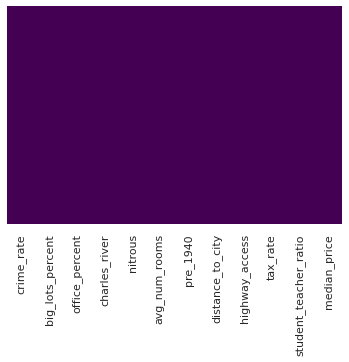

In [11]:
# Checking for any missing data
sns.heatmap(ds.isnull(), yticklabels=False,cbar=False,cmap='viridis')

No missing data

# Task 5: Data Visualization

<Figure size 864x576 with 0 Axes>

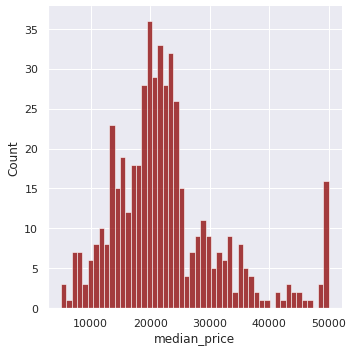

In [12]:
# Visualize median price
plt.figure(figsize=(12,8))
sns.displot(ds['median_price'], kde=False, color='darkred', bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



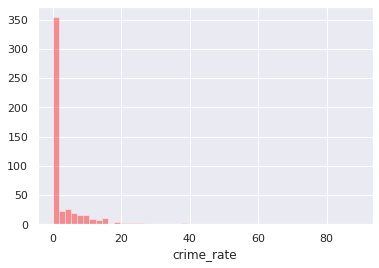

In [13]:
# Visualize crime rate
sns.distplot(ds['crime_rate'], kde=False, color='red')

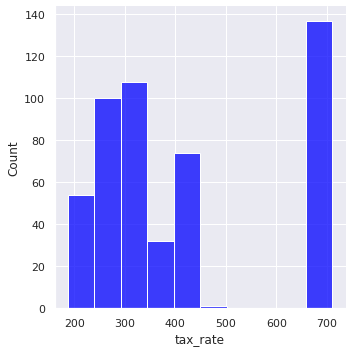

In [14]:
# Visualize tax rate 
sns.displot(ds['tax_rate'], kde=False, color='blue')

Text(0.5, 1.0, 'Median Price in $1000s')

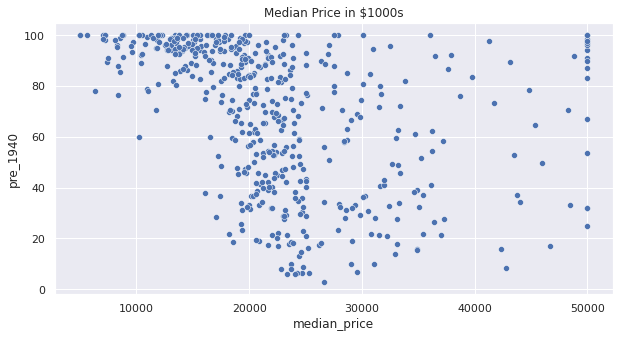

In [15]:
# Visualize median price vs pre 1940
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='median_price', y='pre_1940', data=ds)
ax.set_title("Median Price in $1000s")

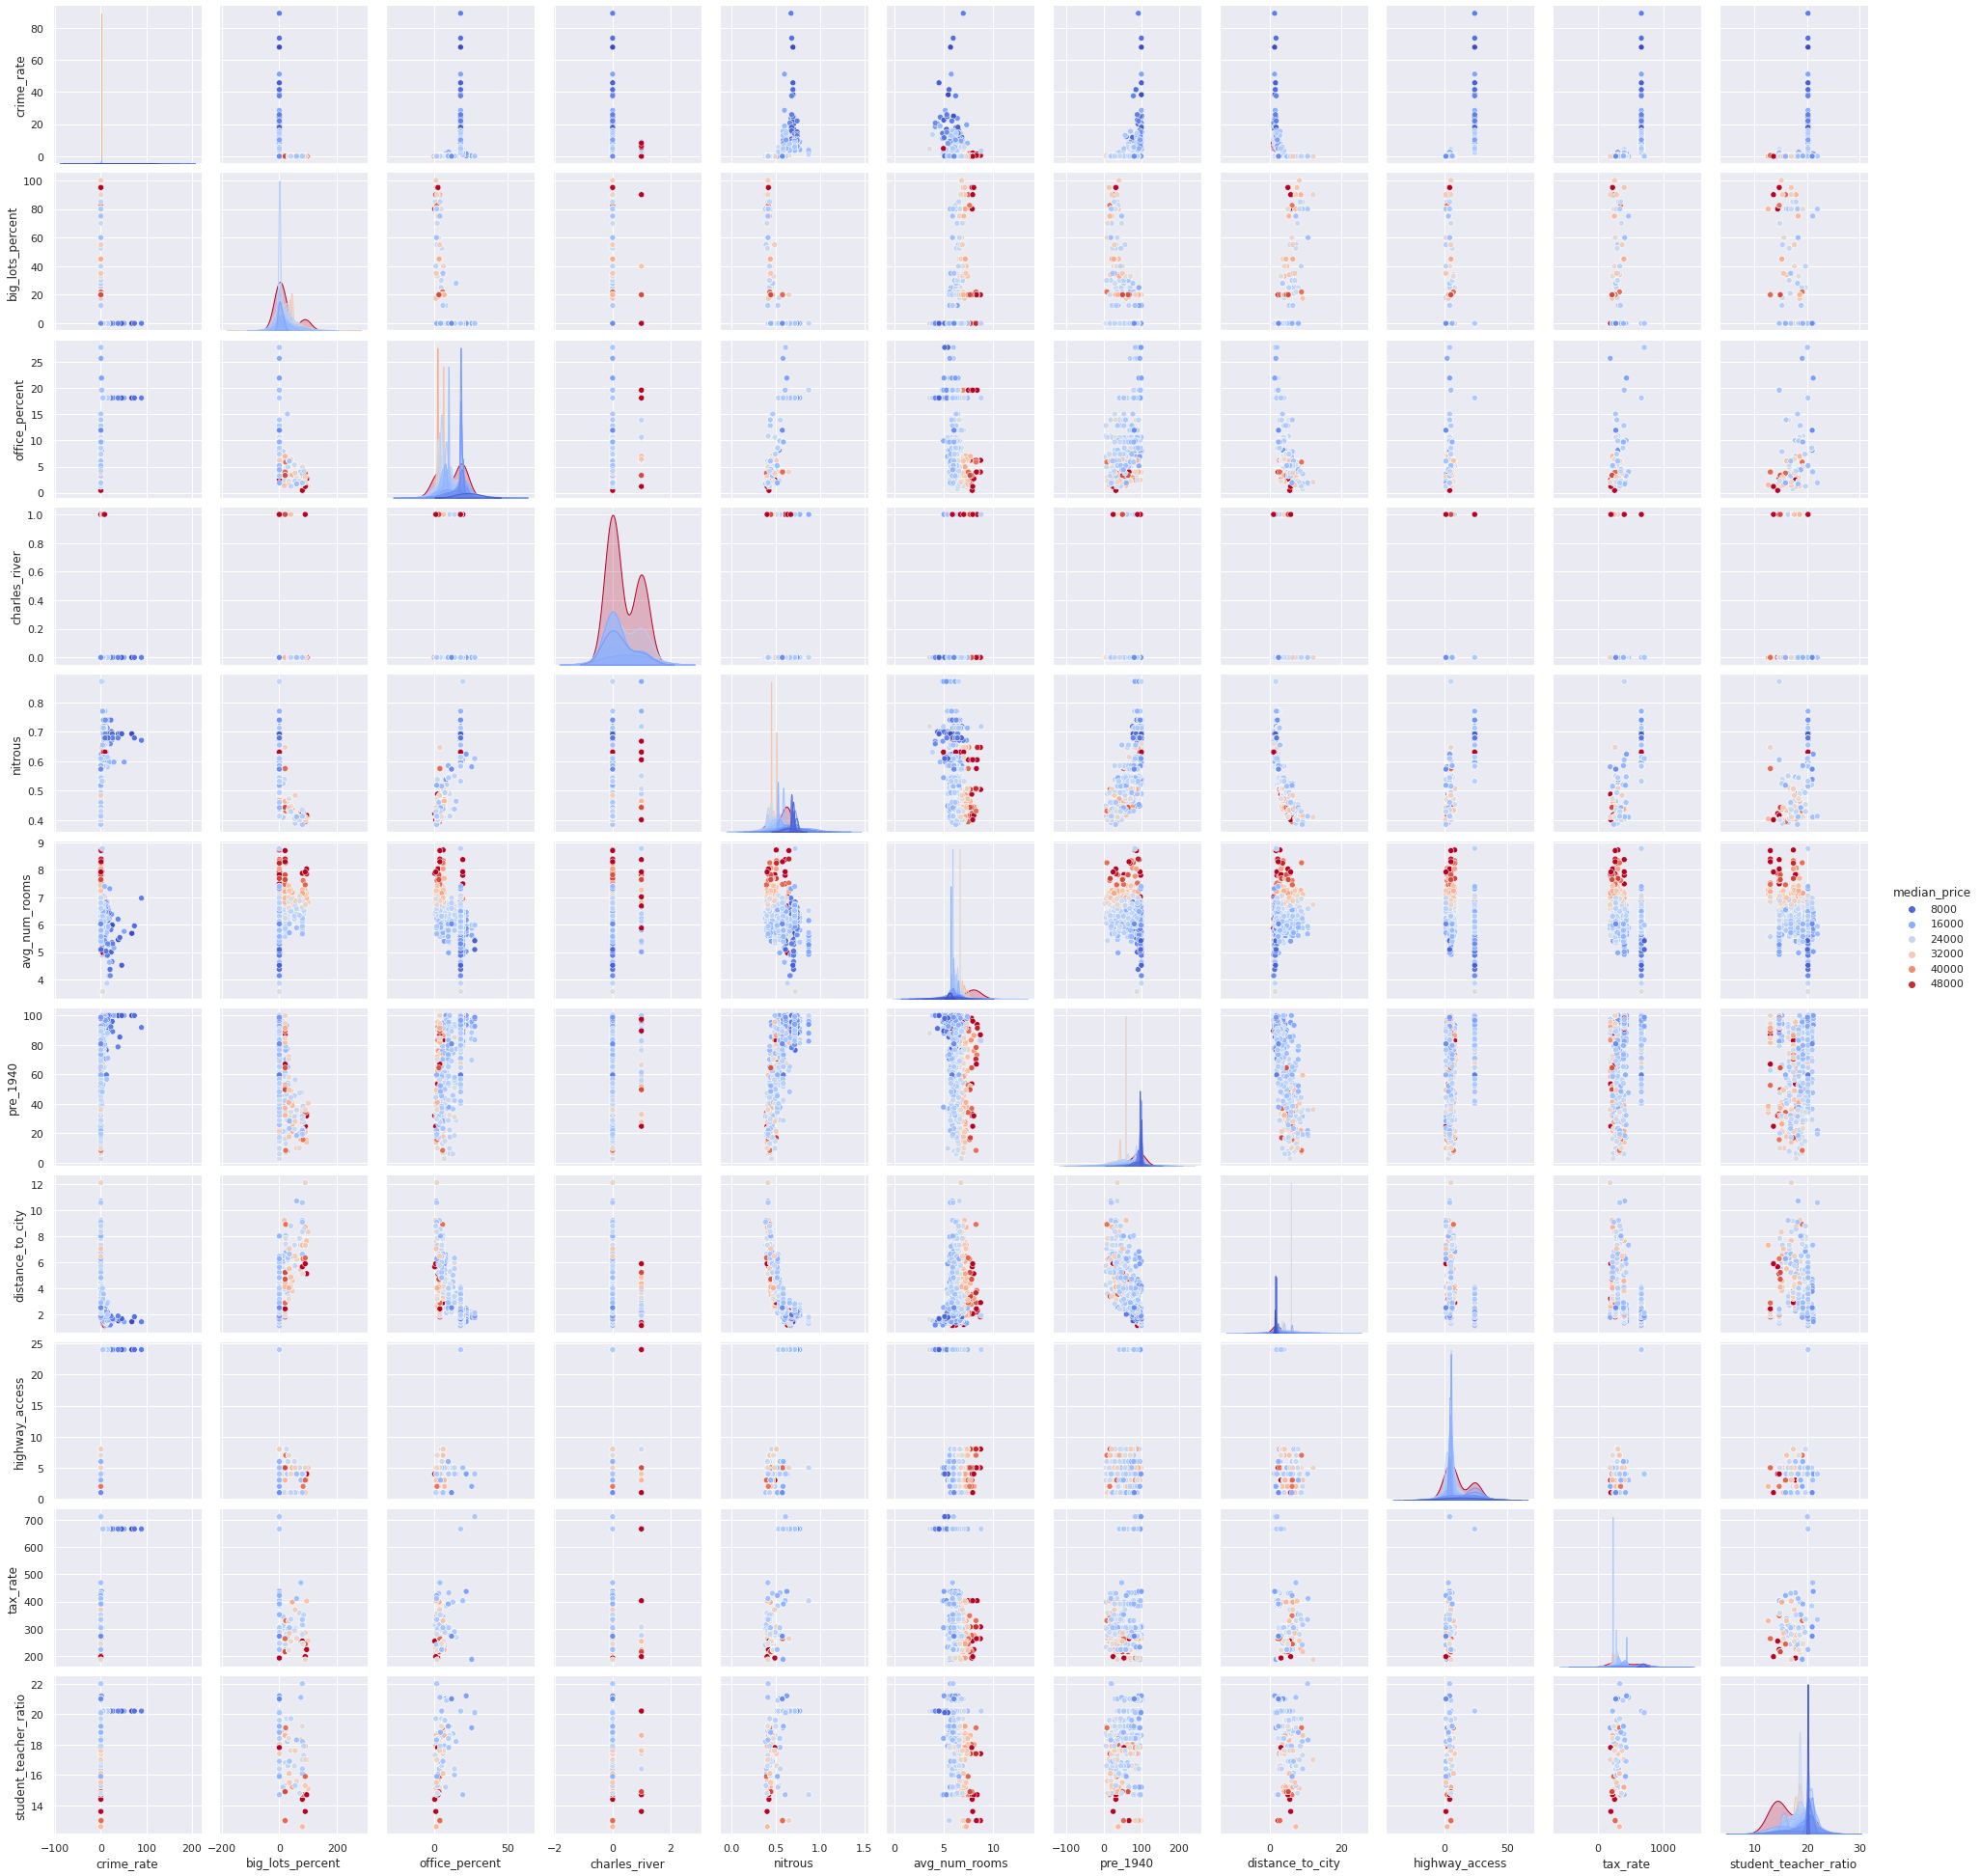

In [16]:
# Visualize various configurations with median price
sns.pairplot(ds,hue='median_price',palette='coolwarm')

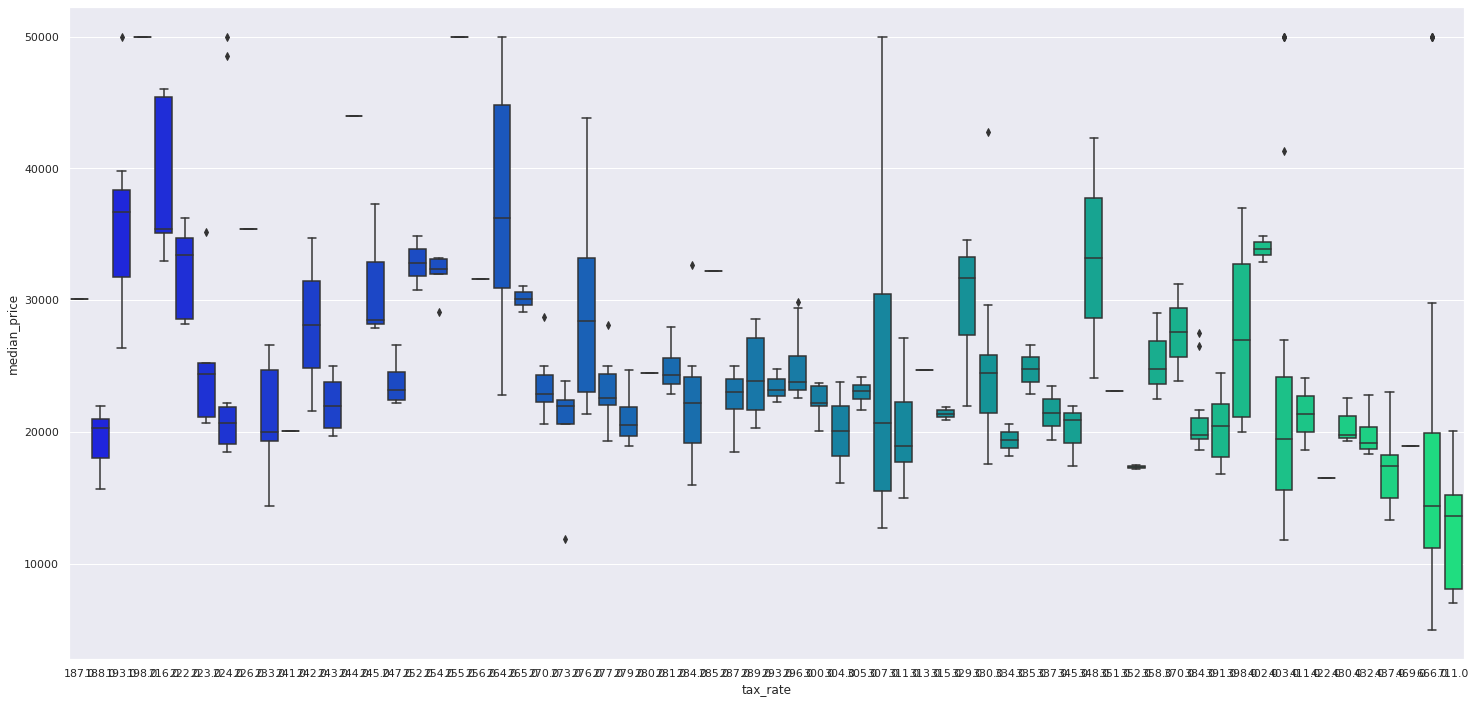

In [17]:
# Visualize median price vs tax rate
plt.figure(figsize=(25,12))
sns.boxplot(x='tax_rate', y='median_price', data=ds, palette='winter')

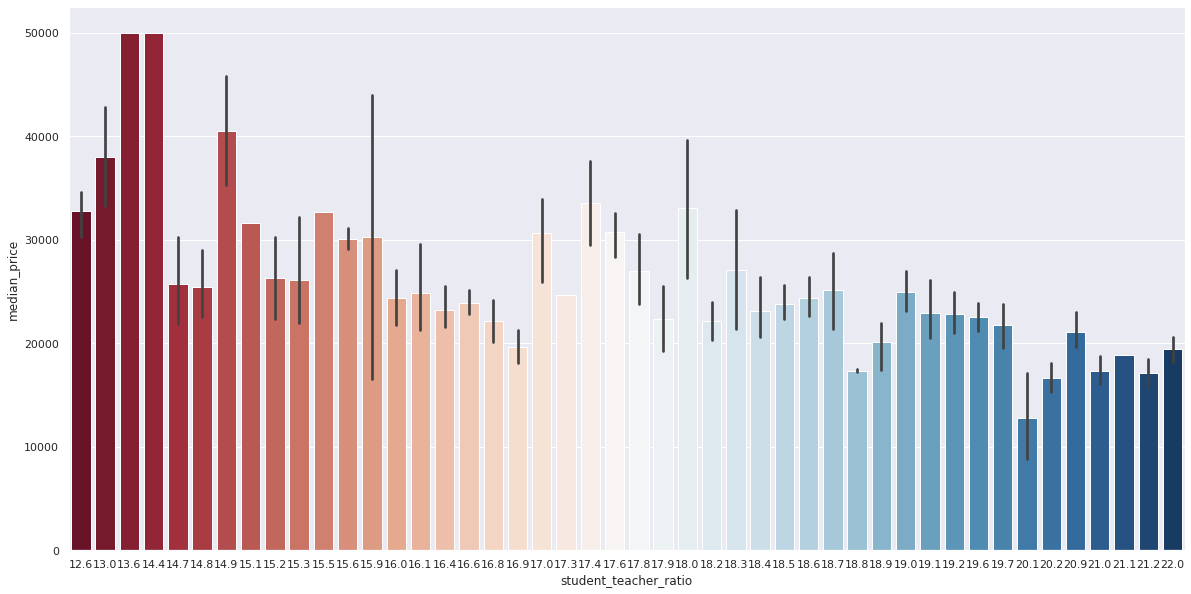

In [18]:
# Visualize median price vs student teacher ratio
plt.figure(figsize=(20,10))
splot=sns.barplot(x='student_teacher_ratio',y='median_price',palette='RdBu',data=ds)
plt.show()

# Task 6:Build Models

In [19]:
# Perform Train, Test Split
from sklearn.model_selection import train_test_split

In [20]:
df_LinearRegression_Binary_MP_ANR = ds[['median_price', 'student_teacher_ratio']]

In [21]:
X = np.array(df_LinearRegression_Binary_MP_ANR['student_teacher_ratio']).reshape(-1, 1)

In [22]:
y = np.array(df_LinearRegression_Binary_MP_ANR['median_price']).reshape(-1, 1)

In [23]:
df_LinearRegression_Binary_MP_ANR.dropna(inplace = True)

In [24]:
# Split data set into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

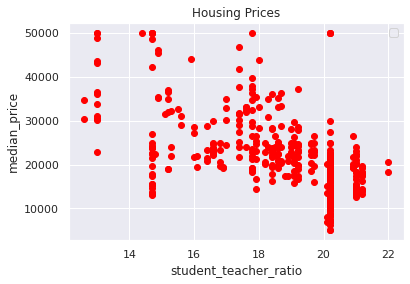

In [25]:
# Visualize training set
plt.scatter(X_train, y_train,color='red')
plt.title('Housing Prices')
plt.xlabel('student_teacher_ratio')
plt.ylabel('median_price')
plt.legend()
plt.show()

In [26]:
#  Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Conduct a linear regression
from sklearn.linear_model import LinearRegression

In [29]:
# Create the model by assigning a variable the class pertaining to the model selected
regressor = LinearRegression()

In [30]:
 # Train the Model created by using the fit method
regressor.fit(X_train, y_train)

LinearRegression()

#Task 10: Making Predictions

In [31]:
y_predictions = regressor.predict(X_test)
print(regressor.score(X_test, y_test))

0.08528476909315619


In [32]:
# Split data set 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.24738408466466077


In [33]:
# Split data set 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.17090860116659923


In [34]:
# Split data set 65% training and 35% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.2623259004911408


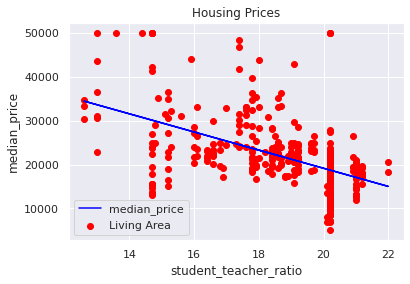

In [35]:
# Visualize prediction
plt.scatter(X_train, y_train,color="red",label="Living Area")
plt.title('Housing Prices')
plt.plot(X_train,regressor.predict(X_train),color="blue",label='median_price')
plt.xlabel('student_teacher_ratio')
plt.ylabel('median_price')
plt.legend()
plt.show()

# KNR

In [97]:
# Using KNR model

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
# Start value of K at 1 (K=1)
knr = KNeighborsRegressor(n_neighbors=1) 

In [38]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [39]:
pred = knr.predict(X_test)

In [ ]:
# Evaluate the model

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
# Check model prediction accuracy
knr_prediction_accuracy = knr.score(X_train, y_train)
print('With k = 1')
print(knr_prediction_accuracy)

With k = 1
-0.16539640664184163


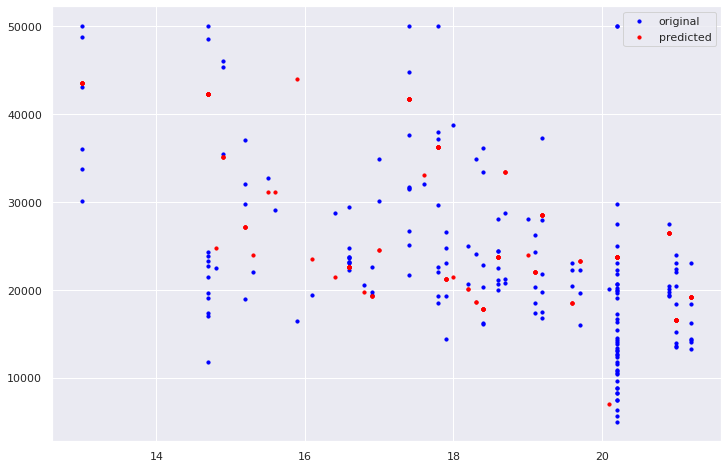

In [42]:
# Visualize prediction
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, s = 10, color="blue", label="original")
plt.scatter(X_test, pred, s = 10, color="red", label="predicted")
plt.legend()
plt.show()

In [43]:
knr = KNeighborsRegressor(n_neighbors=5)

In [44]:
knr.fit(X_train,y_train)
pred = knr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

# Check model prediction accuracy
knr_prediction_accuracy = knr.score(X_train, y_train)
print('With k = 5')
print(knr_prediction_accuracy)

With k = 5
0.3476481274397416


In [45]:
knr = KNeighborsRegressor(n_neighbors=15)

In [46]:
knr.fit(X_train,y_train)
pred = knr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

# Check model prediction accuracy
knr_prediction_accuracy = knr.score(X_train, y_train)
print('With k = 15')
print(knr_prediction_accuracy)

With k = 15
0.33761321968126545


In [47]:
knr = KNeighborsRegressor(n_neighbors=40)

In [48]:
knr.fit(X_train,y_train)
pred = knr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

# Check model prediction accuracy
knr_prediction_accuracy = knr.score(X_train, y_train)
print ('With k = 40')
print(knr_prediction_accuracy)

With k = 40
0.2969651869334252


# Conclusion

After my analysis of the house prices data set which included the following features;
 crime_rate, big_lots_percent, office_percent,
 charles_river, nitrous, avg_num_rooms,
 pre_1940, distance_to_city, highway_access,
 tax_rate, student_teacher_ratio, median_price.

 I analysed the correlation between median price and pre 1940, median price and tax rate, median price and student teacher ratio. I focused on the median price in relation to student teacher ratio which showed when student teacher ratio are low, median price of houses are high.

 Based on the analysis Linear Regression model yielded an accuracy range of 8% - 26% and KNeighborsRegressor(KNR) yielded an accuracy range of 29% - 34%. The KNR has a higher accuracy based on my analysis. 